# [Numpy.polyfit を使ったカーブフィッティング](https://qiita.com/maskot1977/items/f9e84fb6e62f7015d6c4) を写しつつやる

In [1]:
# 模擬データ
x_observed = [9, 28, 38, 58, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 188, 198, 208, 218, 228, 238, 278, 288, 298]
y_observed = [51, 80, 112, 294, 286, 110, 59, 70, 56, 70, 104, 59, 59, 72, 87, 99, 64, 60, 74, 151, 157, 57, 83]

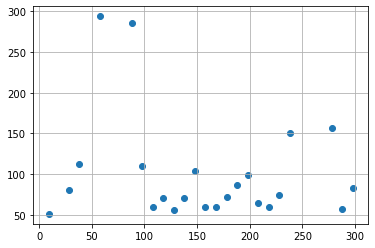

In [2]:
# データの図示
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_observed, y_observed)
plt.grid()

In [3]:
# フィッティングカーブを描くx座標を作る
import numpy as np
x_latent = np.linspace(min(x_observed), max(x_observed), 100)

In [4]:
# Numpy.polyfitを用いた最小二乗法
cf1 = ["最小二乗法(1次式) ", lambda x, y: np.polyfit(x,y,1)]
cf2 = ["最小2乗法（2次式）", lambda x, y: np.polyfit(x, y, 2)]
cf3 = ["最小2乗法（3次式）", lambda x, y: np.polyfit(x, y, 3)]
cf4 = ["最小2乗法（4次式）", lambda x, y: np.polyfit(x, y, 4)]
cf5 = ["最小2乗法（5次式）", lambda x, y: np.polyfit(x, y, 5)]
cf6 = ["最小2乗法（6次式）", lambda x, y: np.polyfit(x, y, 6)]
cf7 = ["最小2乗法（7次式）", lambda x, y: np.polyfit(x, y, 7)]
cf8 = ["最小2乗法（8次式）", lambda x, y: np.polyfit(x, y, 8)]
cf9 = ["最小2乗法（9次式）", lambda x, y: np.polyfit(x, y, 9)]

In [5]:
# Sympyを用いた数式の表示の準備
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)

x, y = sym.symbols("x y")

<function <lambda> at 0x7fc2a0116940>


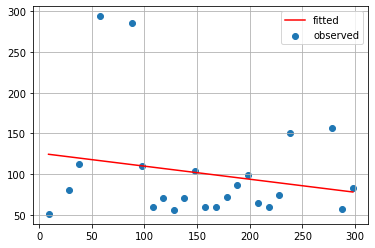

<function <lambda> at 0x7fc23f47ef70>


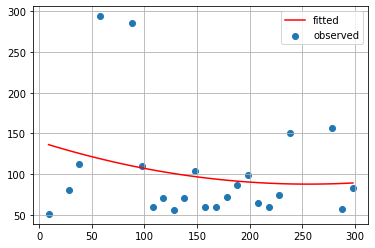

<function <lambda> at 0x7fc23f47edc0>


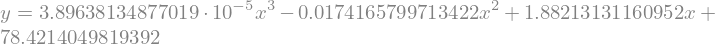

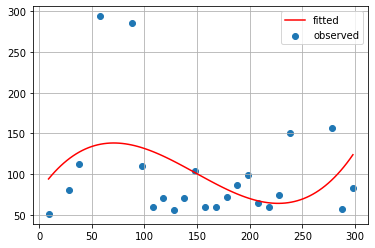

<function <lambda> at 0x7fc23f47ed30>


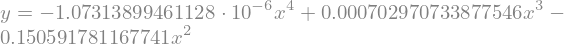

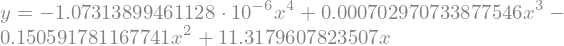

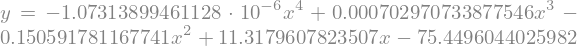

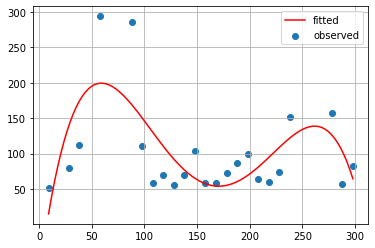

<function <lambda> at 0x7fc247547430>


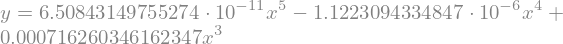

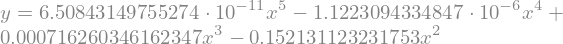

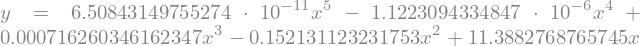

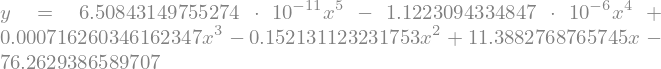

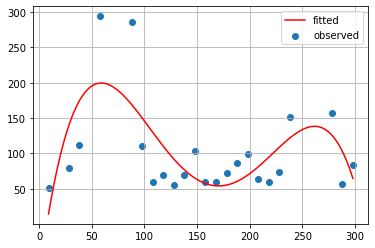

<function <lambda> at 0x7fc2475479d0>


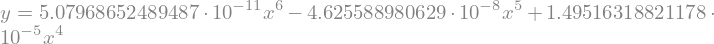

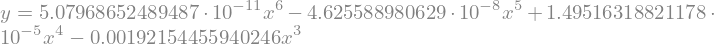

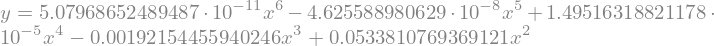

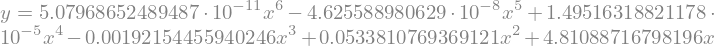

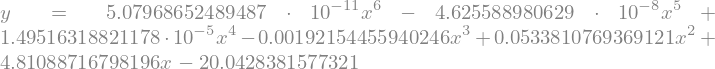

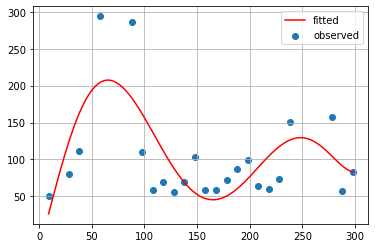

<function <lambda> at 0x7fc247547550>


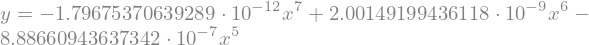

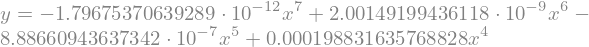

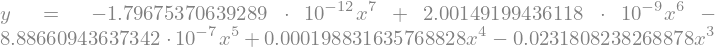

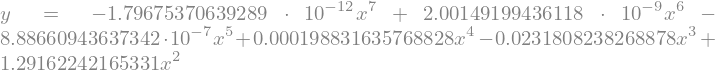

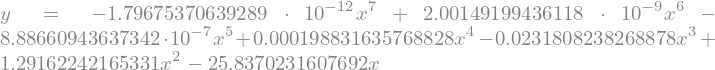

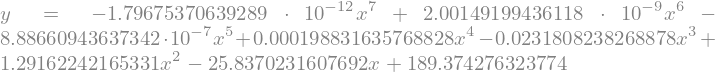

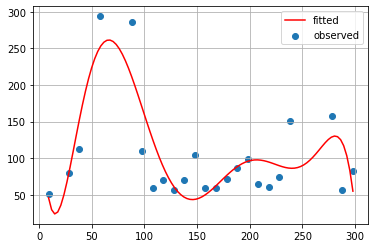

<function <lambda> at 0x7fc247547af0>


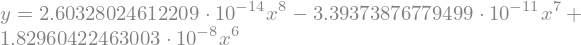

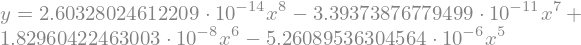

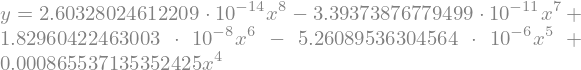

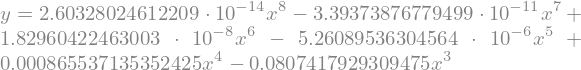

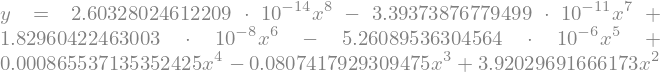

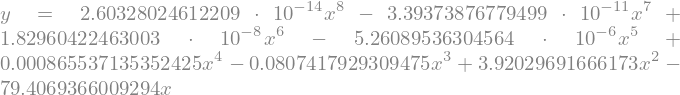

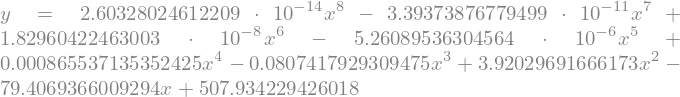

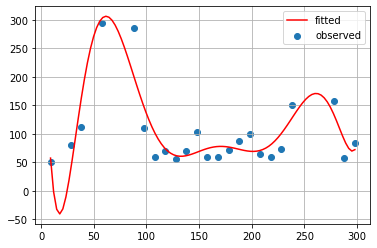

<function <lambda> at 0x7fc247547670>


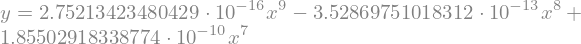

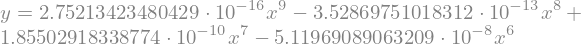

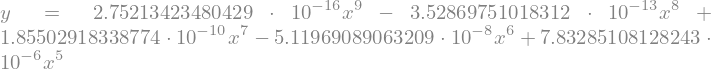

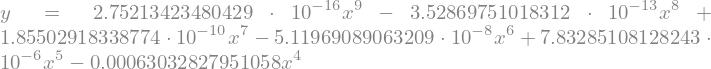

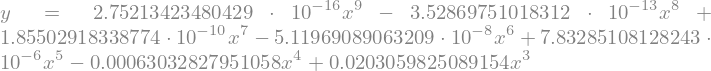

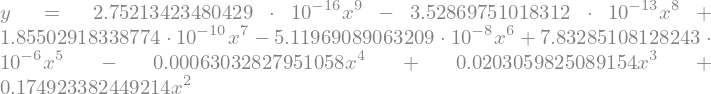

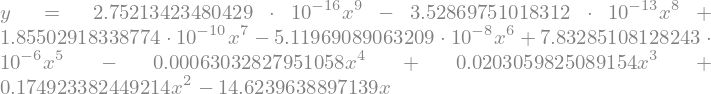

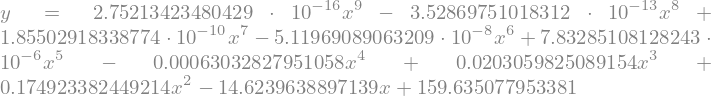

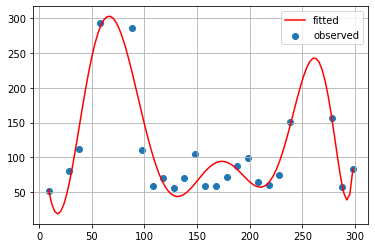

In [8]:
# 最小二乗法によるカーブフィッティング

for method_name, method in [cf1, cf2, cf3, cf4, cf5, cf6, cf7, cf8, cf9]:
    print(method)
    # 係数の計算
    coefficients = method(x_observed, y_observed)
    
    # Sympyを用いた数式の表示
    expr = 0
    for index, coefficient in enumerate(coefficients):
        expr += coefficient * x ** (len(coefficients) - index - 1)
        display(sym.Eq(y, expr))
        
    # プロットと曲線の表示
    fitted_curve = np.poly1d(method(x_observed, y_observed))(x_latent)
    plt.scatter(x_observed, y_observed, label="observed")
    plt.plot(x_latent, fitted_curve, c="red", label="fitted")
    plt.grid()
    plt.legend()
    plt.show()
    